In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/kathanbhavsar/Desktop/Python,DS,ML/DATA/gene_expression.csv')

In [5]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

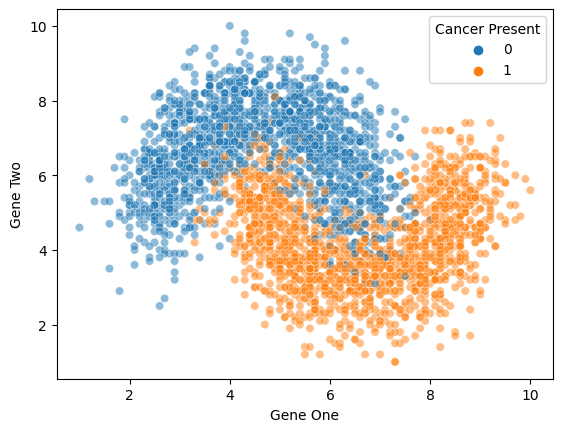

In [6]:
sns.scatterplot(df,x = 'Gene One',y="Gene Two",hue ='Cancer Present',alpha=0.5)



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [8]:
len(df)

3000

In [9]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

(4.0, 8.0)

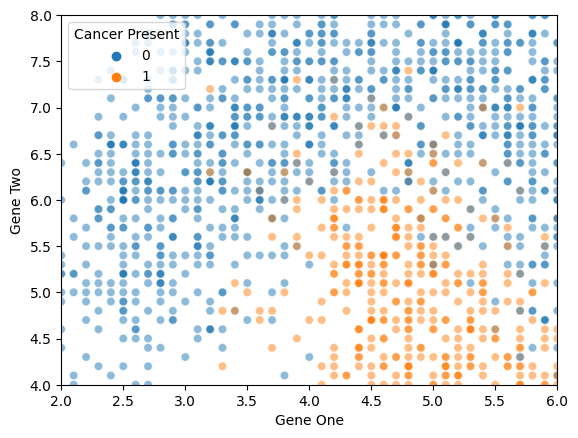

In [10]:
sns.scatterplot(df,x = 'Gene One',y="Gene Two",hue ='Cancer Present',alpha=0.5)
plt.xlim(2,6)
plt.ylim(4,8)


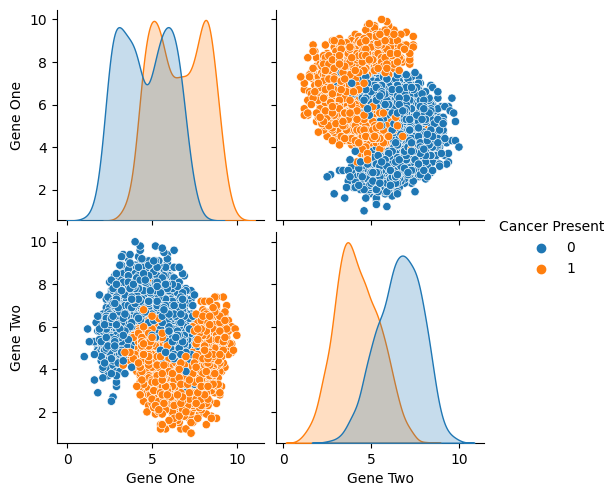

In [11]:
sns.pairplot(df,hue = 'Cancer Present')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df
X = df.drop('Cancer Present',axis =1)
y = df['Cancer Present']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
scaler = StandardScaler()

In [15]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
model = KNeighborsClassifier(n_neighbors=1)

In [18]:
model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred = model.predict(scaled_X_test)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
confusion_matrix(y_test,pred)

array([[424,  46],
       [ 49, 381]])

In [22]:
print(classification_report(y_test,pred))
from sklearn.metrics import accuracy_score

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       470
           1       0.89      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [23]:
##Elbow Method
test_error_rate = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    
    y_pred = knn_model.predict(scaled_X_test)
    acc = accuracy_score(y_test,y_pred)
    test_error_rate.append((1-acc))
    

Text(0.5, 0, 'No of k')

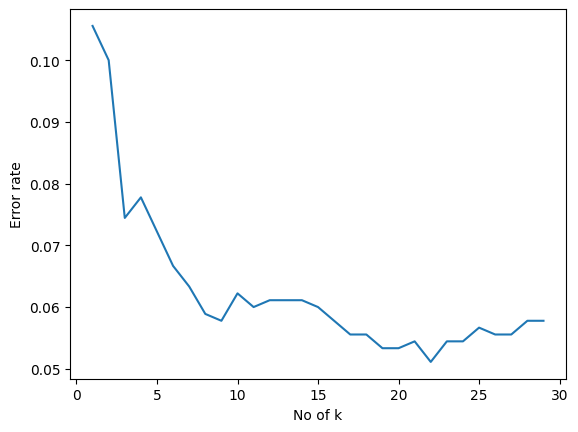

In [24]:
plt.plot(range(1,30),test_error_rate)
plt.ylabel("Error rate")
plt.xlabel('No of k')

In [25]:
## Pipeline ----> GridsearchCV


In [26]:
scaler = StandardScaler()

In [28]:
knn = KNeighborsClassifier()

In [29]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [30]:
operation = [('scaler',scaler),('knn',knn)]

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
pipe = Pipeline(operation)

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
k_values = list(range(1,20))

In [35]:
param_grid = {}

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [36]:
param_grid = {'knn__n_neighbors':k_values}

In [37]:
full_cv = GridSearchCV(pipe,param_grid=param_grid,cv=5,scoring='accuracy')

In [44]:
full_cv.fit(X_train,y_train)

In [42]:
full_cv.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [45]:
full_pred = full_cv.predict(X_test)

In [46]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900

